In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

C:\Users\kapad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kapad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\kapad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\kapad\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
df = pd.read_parquet("C:\\Users\\kapad\\panda\\TweetAnalyzer\\final_twitter_data.parquet")

In [6]:
df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet


In [7]:
df.shape

(308338, 12)

In [8]:
df.author_id.value_counts()

1260870565541396480    22148
730098730943324162     13537
114774406               8983
977593370720854018      6961
284725708               5372
                       ...  
64766208                   1
246393339                  1
1084125465160413185        1
815376044798545920         1
422834462                  1
Name: author_id, Length: 22867, dtype: int64

In [9]:
dF=df.drop_duplicates(subset=['tweet_id'])

In [10]:
dF.shape

(181552, 12)

In [11]:
dF.author_id.value_counts()

1260870565541396480    9157
730098730943324162     7042
977593370720854018     5867
114774406              3873
934565197423038465     3368
                       ... 
440704451                 1
821016065874554883        1
2499675181                1
1236952254218977281       1
422834462                 1
Name: author_id, Length: 22867, dtype: int64

### To get the total number of tweets and retweets in accordance to the hashtag create a different data frame.

In [12]:
data_pie = dF['tweet_type'].value_counts().rename_axis('tweet_type').reset_index(name='tweets_count')
data_pie

,tweet_type,tweets_count
0,retweet,130646
1,original,50906


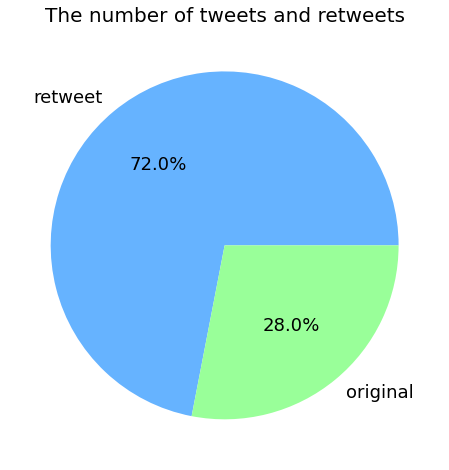

In [20]:
plt.figure(figsize=(8,8))
colors = ['#66b3ff','#99ff99','#ff9999','#ffcc99']
plt.pie(data_pie.tweets_count, labels=data_pie.tweet_type,colors=colors, autopct='%1.1f%%',textprops={'fontsize': 18})
plt.title('The number of tweets and retweets',fontsize=20)
#plt.legend(data_pie.tweets_count,fontsize=20)
plt.show()

In [21]:
retweet_c = dF.loc[dF['tweet_type'] == 'original', 'retweet_count'].sum()
retweet_c

1213653

In [22]:
reply_c = dF.loc[dF['tweet_type'] == 'original', 'reply_count'].sum()
reply_c

340000

In [23]:
quote_c=dF['quote_count'].sum()
quote_c

422720

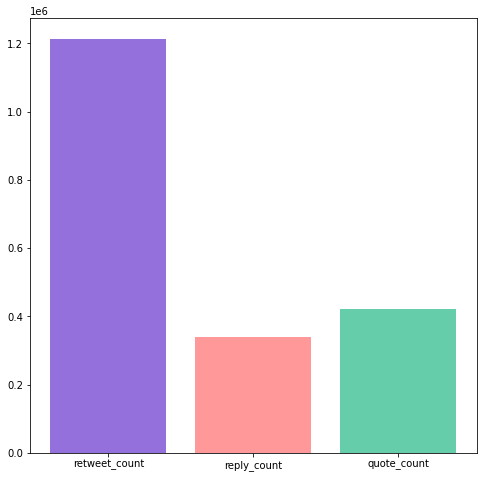

In [32]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_axes([0,0,1,1])
colors = ['mediumpurple','#ff9999','mediumaquamarine']
labels = ['retweet_count', 'reply_count', 'quote_count']
values = [retweet_c, reply_c, quote_c]
plt.bar(labels,values,color=colors)
plt.show()